# Import Data

In [1]:
import tensorflow
import keras
import numpy as np
np.random.seed(1248)
import pandas as pd

Using TensorFlow backend.


In [3]:
data = pd.read_csv('../data/buffer_overflow_data.csv.gz')

In [4]:
labels = data.copy()
del labels['Unnamed: 0']
del labels['Unnamed: 0.1']
del labels['filename']
del labels['code']
del labels['flaw']
del labels['flaw_loc']
labels = labels.drop_duplicates().sort_values('testcase_ID').reset_index(drop=True)

In [8]:
x = pd.read_csv("../data/buffer_overflow_graph_embeddings.csv.gz")
x['testcase_ID'] = x['type']
del x['type']
x = x.sort_values("testcase_ID").reset_index(drop=True)

In [9]:
y = labels['bug']
#x = x.drop('testcase_ID', axis='columns')

In [10]:
x['testcase_ID'] = x['testcase_ID'].abs()

In [11]:
x['label'] = y

In [12]:
x['label'] = x['label']+0

In [13]:
x = x.sort_values(['testcase_ID'], ascending=[True])

In [14]:
x = x.drop(['testcase_ID'],axis = 1)

In [15]:
x.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,label
10750,1.063358,-1.228456,1.018970,1.014858,0.355167,2.142064,-0.478193,-0.484101,-0.821799,0.590820,...,0.458926,-1.066467,0.416754,0.339325,1.731976,-1.386569,-1.146801,0.061810,-0.814084,1
10751,0.910154,-0.821479,0.957234,0.435156,-0.308388,2.235716,-0.757282,-0.155062,-1.316913,0.382822,...,0.629068,-1.549051,0.346083,-0.093151,0.636493,-0.748481,-0.803023,0.275279,-1.164181,0
10752,0.786060,-1.190646,0.842850,1.132795,0.026180,2.176560,-0.237262,-0.516491,-0.601623,0.549145,...,0.413117,-0.948823,0.111702,0.271978,1.669998,-1.178218,-1.442209,0.222773,-0.974331,0
10749,0.831610,-0.821665,0.462280,1.104118,0.043573,1.914864,-0.240263,-0.247540,-0.782924,0.650780,...,0.455815,-1.203662,0.573264,0.481934,1.343881,-1.128915,-1.169284,-0.349694,-1.086358,1
10753,0.582568,-1.052597,0.664881,1.111387,-0.142810,1.926291,-0.414423,-0.147685,-0.765143,0.504171,...,0.622557,-1.336874,0.376597,0.527256,1.438082,-0.825990,-1.171456,-0.388640,-1.298043,0


In [16]:
data1 = x.iloc[0::2,:]
data2 = x.iloc[1::2,:]

In [17]:
data2.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,label
10751,0.910154,-0.821479,0.957234,0.435156,-0.308388,2.235716,-0.757282,-0.155062,-1.316913,0.382822,...,0.629068,-1.549051,0.346083,-0.093151,0.636493,-0.748481,-0.803023,0.275279,-1.164181,0
10749,0.831610,-0.821665,0.462280,1.104118,0.043573,1.914864,-0.240263,-0.247540,-0.782924,0.650780,...,0.455815,-1.203662,0.573264,0.481934,1.343881,-1.128915,-1.169284,-0.349694,-1.086358,1
10748,0.735931,-0.905028,0.957479,1.087067,0.022738,1.533288,-0.437489,-0.022053,-0.654308,0.298448,...,0.413009,-0.532591,0.367282,0.089370,1.539474,-0.978331,-1.221906,0.213263,-1.004463,1
10754,0.409700,-1.535115,1.147691,1.179514,0.374585,1.531873,-0.401765,-0.562815,-0.920540,0.230366,...,0.657058,-0.418744,0.292369,0.513864,2.064001,-1.223822,-1.211890,-0.088715,-1.702245,0
10746,0.842448,-1.098243,1.024335,0.796683,0.054049,1.917223,-0.711854,-0.271464,-0.696059,-0.134586,...,0.520613,-1.094478,0.180841,0.070534,1.290091,-0.833192,-0.945936,0.080639,-0.843151,1


In [95]:
data1.to_csv("../data/data1.csv")
data2.to_csv("../data/data2.csv")

In [2]:
data1 = pd.read_csv("../data/data1.csv", index_col  = None)
data2 = pd.read_csv("../data/data2.csv", index_col  = None)

In [3]:
data1 = data1.drop('Unnamed: 0',axis =1)

In [4]:
data2.iloc[:,1:129].head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0.910154,-0.821479,0.957234,0.435156,-0.308388,2.235716,-0.757282,-0.155062,-1.316913,0.382822,...,-0.051530,0.629068,-1.549051,0.346083,-0.093151,0.636493,-0.748481,-0.803023,0.275279,-1.164181
1,0.831610,-0.821665,0.462280,1.104118,0.043573,1.914864,-0.240263,-0.247540,-0.782924,0.650780,...,0.072116,0.455815,-1.203662,0.573264,0.481934,1.343881,-1.128915,-1.169284,-0.349694,-1.086358
2,0.735931,-0.905028,0.957479,1.087067,0.022738,1.533288,-0.437489,-0.022053,-0.654308,0.298448,...,-0.130969,0.413009,-0.532591,0.367282,0.089370,1.539474,-0.978331,-1.221906,0.213263,-1.004463
3,0.409700,-1.535115,1.147691,1.179514,0.374585,1.531873,-0.401765,-0.562815,-0.920540,0.230366,...,-0.123758,0.657058,-0.418744,0.292369,0.513864,2.064001,-1.223822,-1.211890,-0.088715,-1.702245
4,0.842448,-1.098243,1.024335,0.796683,0.054049,1.917223,-0.711854,-0.271464,-0.696059,-0.134586,...,-0.219389,0.520613,-1.094478,0.180841,0.070534,1.290091,-0.833192,-0.945936,0.080639,-0.843151


In [5]:
data1.iloc[:,1:129].head()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,1.063358,-1.228456,1.018970,1.014858,0.355167,2.142064,-0.478193,-0.484101,-0.821799,0.590820,...,-0.350950,0.458926,-1.066467,0.416754,0.339325,1.731976,-1.386569,-1.146801,0.061810,-0.814084
1,0.786060,-1.190646,0.842850,1.132795,0.026180,2.176560,-0.237262,-0.516491,-0.601623,0.549145,...,0.015356,0.413117,-0.948823,0.111702,0.271978,1.669998,-1.178218,-1.442209,0.222773,-0.974331
2,0.582568,-1.052597,0.664881,1.111387,-0.142810,1.926291,-0.414423,-0.147685,-0.765143,0.504171,...,0.122572,0.622557,-1.336874,0.376597,0.527256,1.438082,-0.825990,-1.171456,-0.388640,-1.298043
3,0.831811,-1.016883,0.836120,1.028817,0.300319,2.357464,-0.432461,-0.558174,-1.030560,0.782374,...,0.054439,0.405428,-1.104983,0.498969,0.225623,1.457570,-1.218916,-1.484174,0.198284,-0.938085
4,0.728147,-1.189957,1.011299,0.726809,0.029509,1.870214,-0.706424,-0.269049,-0.702594,-0.128107,...,-0.108494,0.567815,-1.107141,0.155516,0.023302,1.370907,-0.567673,-1.024017,0.080452,-0.900337


In [6]:
data = pd.concat([data1.iloc[:,1:129],data2.iloc[:,1:129],data1.iloc[:,130],data2.iloc[:,130]],axis = 1)

In [7]:
label = data.iloc[:,128*2:128*2+2]
data = data.iloc[:,0:128*2]

In [8]:
import sklearn

In [9]:
data_swap = pd.concat([data.iloc[:,128:],data.iloc[:,0:128]],axis = 1)
label_swap = pd.concat([label.iloc[:,1],label.iloc[:,0]],axis = 1)
label_swap.head(1)

,label,130
0,0,1


In [10]:
x = list(np.array(data))
x.extend(list(np.array(data_swap)))
y = list(np.array(label))
y.extend(list(np.array(label_swap)))
x = np.array(x)
y = np.array(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
y_train.shape

(17201, 2)

In [36]:
x_train.shape

(17201, 256)

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [37]:
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop, Adadelta, Adam

In [38]:
n_timesteps, n_features, n_outputs = x_train.shape[0], x_train.shape[1], y_train.shape[0]

In [39]:
model = Sequential()
conv_model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 49,666
Trainable params: 49,666
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
17201/17201 [==============================] - 1s 30us/step - loss: 0.6703 - acc: 0.5818
Epoch 2/50
17201/17201 [==============================] - 0s 18us/step - loss: 0.5342 - acc: 0.7276
Epoch 3/50
17201/17201 [==============================] - 0s 18us/step - loss: 0.3974 - acc: 0.8147
Epoch 4/50
17201/17201 [==============================] - 0s 19us/step - loss: 0.2916 - acc: 0.8800
Epoch 5/50
17201/17201 [==============================] - 0s 18us/step - loss: 0.2488 - acc: 0.8963
Epoch 6/50
17201/17201 [==============================] - 0s 19us/step - loss: 0.2173 - acc: 0.9062
Epoch 7/50
17201/17201 [==============================] - 0s 19us/step - loss: 0.1987 - acc: 0.9144
Epoch 8/50
17201/17201 [==============================] - 0s 20us/step - loss: 0.1849 - acc: 0.9184
Epoch 9/50
17201/17201 [==============================] - 0s 19us/step - loss: 0.1651 - acc: 0.9251
Epoch 10/50
17201/17201 [==============================] - 0s 19us/step - loss: 0.1588 - acc: 0.9280

In [42]:
model.evaluate(x_test,y_test)

4301/4301 [==============================] - 0s 29us/step


[0.06803513950759438, 0.9607068123692165]

## Data swapping

Named swapped data as `test`

In [45]:
def data_swap(data):
    temp1 = list(data[128:])
    temp2 = list(data[0:128])
    temp1.extend(temp2)
    data = np.array(temp1)
    return data

In [46]:
y_test[0:2]

array([[0, 1],
       [1, 0]])

In [47]:
test = np.array(list(map(data_swap,x_test)))

In [48]:
a = list(x_test[0][128:]).extend(list(x_test[0][0:128]))

In [49]:
model.predict(x_test[0:10])

array([[1.8941414e-03, 9.9810588e-01],
       [1.0000000e+00, 2.0849806e-09],
       [6.9676611e-09, 1.0000000e+00],
       [1.7881762e-02, 9.8211825e-01],
       [1.9484385e-06, 9.9999809e-01],
       [9.9649835e-01, 3.5016444e-03],
       [9.8462787e-04, 9.9901533e-01],
       [9.9973398e-01, 2.6602630e-04],
       [1.8910805e-05, 9.9998105e-01],
       [9.9999249e-01, 7.5521580e-06]], dtype=float32)

In [50]:
model.predict(test[0:10])

array([[9.9287605e-01, 7.1240123e-03],
       [8.8149408e-09, 1.0000000e+00],
       [1.0000000e+00, 2.9782743e-09],
       [9.9698180e-01, 3.0182207e-03],
       [9.9999762e-01, 2.4309338e-06],
       [9.1603480e-04, 9.9908400e-01],
       [9.9862385e-01, 1.3761721e-03],
       [5.5299129e-04, 9.9944705e-01],
       [9.9987924e-01, 1.2076267e-04],
       [1.2663785e-04, 9.9987340e-01]], dtype=float32)

In [51]:
import seaborn as sns
from sklearn import metrics
import matplotlib

In [52]:
y_predict= model.predict_classes(x_test)

In [53]:
y_predict

array([1, 0, 1, ..., 1, 0, 0])

In [54]:
y_test[0] 

array([0, 1])

In [55]:
y_test_classes = []
for i in y_test:
    if sum(i == y_test[0]) == 2:
        y_test_classes.append(1)
    else:
        y_test_classes.append(0)

y_test_classes = np.array(y_test_classes)

## Confusion matrix for x_test

Accuracy: 0.9607068123692165
F1 score: 0.9598670149608169
Recall: 0.9378190255220418
Precision: 0.982976653696498

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2146
           1       0.98      0.94      0.96      2155

   micro avg       0.96      0.96      0.96      4301
   macro avg       0.96      0.96      0.96      4301
weighted avg       0.96      0.96      0.96      4301


 confussion matrix:
 [[2111   35]
 [ 134 2021]]


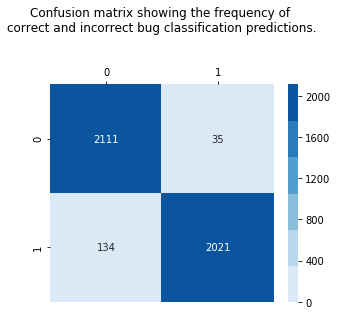

In [57]:
prediction = model.predict_classes(x_test)


from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test_classes, prediction))
print('F1 score:', f1_score(y_test_classes, prediction))
print('Recall:', recall_score(y_test_classes, prediction))
print('Precision:', precision_score(y_test_classes, prediction))
print('\n clasification report:\n', classification_report(y_test_classes,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test_classes, prediction))

confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test_classes, y_predict), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 4)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

## Confusion matrix for test

Test for swapped data

In [58]:
test_pred = model.predict_classes(test)

In [67]:
test_y = y_test == 0

In [70]:
test_classes = []
for i in test_y:
    if sum(i == y_test[0]) == 2:
        test_classes.append(1)
    else:
        test_classes.append(0)

test_classes = np.array(test_classes)

In [61]:
y_test[0]

array([0, 1])

In [71]:
test_classes

array([0, 1, 0, ..., 0, 1, 1])

Accuracy: 0.9639618693327133
F1 score: 0.9631391200951248
Recall: 0.9436160298229264
Precision: 0.9834871296745993

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      2155
           1       0.98      0.94      0.96      2146

   micro avg       0.96      0.96      0.96      4301
   macro avg       0.96      0.96      0.96      4301
weighted avg       0.96      0.96      0.96      4301


 confussion matrix:
 [[2121   34]
 [ 121 2025]]


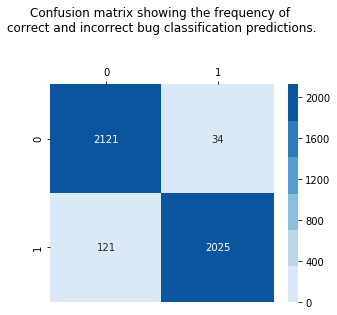

In [72]:
prediction = model.predict_classes(test)


from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(test_classes, prediction))
print('F1 score:', f1_score(test_classes, prediction))
print('Recall:', recall_score(test_classes, prediction))
print('Precision:', precision_score(test_classes, prediction))
print('\n clasification report:\n', classification_report(test_classes,prediction))
print('\n confussion matrix:\n',confusion_matrix(test_classes, prediction))

confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(test_classes, prediction), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 4)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)